In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

In [59]:
# First, write a code where, by changing just the keyword, we can search for multiple things

In [61]:
# setup pytrend library and keyword define

In [63]:
pytrends = TrendReq(hl = 'en-US', tz = 360)
keyword = "cloud computing"

# Data Request

In [66]:
pytrends.build_payload([keyword], cat = 0, timeframe = 'today 12-m', geo='', )

# Top 15 countries where the keywords searched the most, and also create visual representation of it.

In [68]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword, ascending = False).head(15)

TooManyRequestsError: The request failed: Google returned a response with code 429

In [ ]:
plt.figure(figsize =(10,6))
sns.barplot(x = region_data[keyword], y = region_data.index, palette = "Blues_d")
plt.title(f"Top 15 countries searching for '(keyword)' ")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# A world map needs to be plotted showing the countries that search the keyword the most.

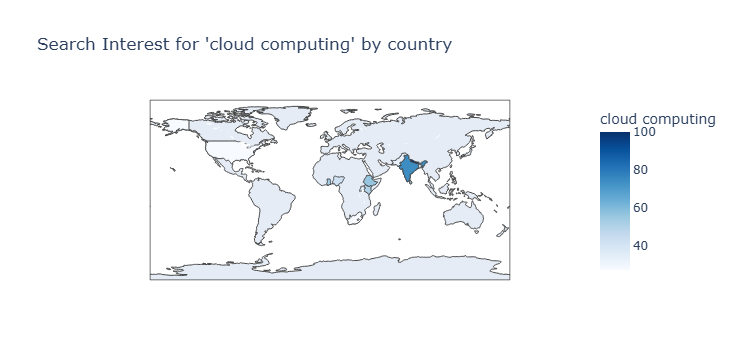

In [72]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                   locations='geoName',
                   locationmode='country names',
                   color=keyword,
                   title=f"Search Interest for '{keyword}' by country",
                   color_continuous_scale='Blues')
fig.show()

# We need to extract the time-wise interest of the keyword - how it trended in different years.

In [75]:
time_df = pytrends.interest_over_time()

TooManyRequestsError: The request failed: Google returned a response with code 429

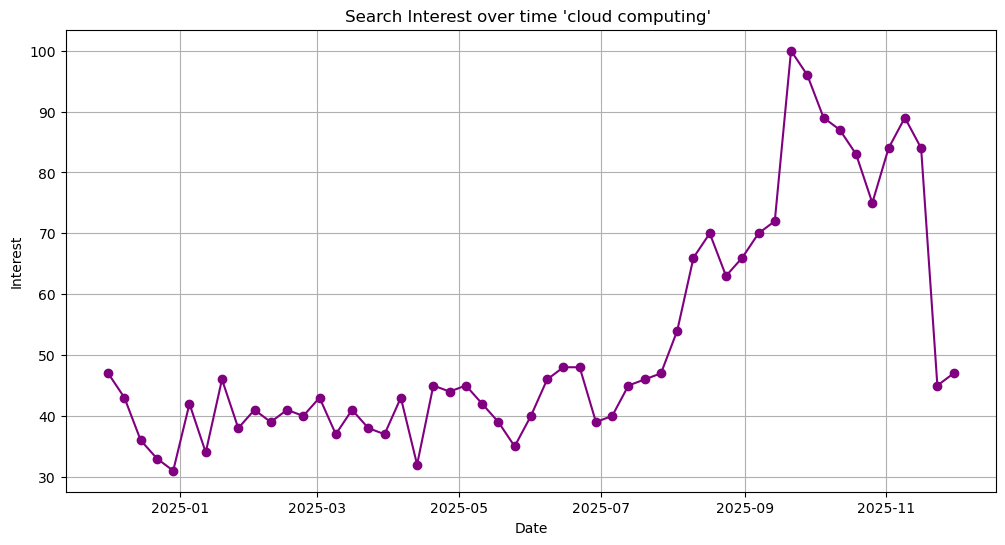

In [77]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker = 'o', color = "purple")
plt.title(f"Search Interest over time '{keyword}' ")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# Compare related keywords and plot the graph.

In [80]:
kw_list = ["cloud Computing", "data science", "machine learning"]
pytrends.build_payload(kw_list, cat= 0, timeframe = 'today 12-m', geo='',gprop='' )

In [89]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label = kw)
plt.title(" Keyword comparison over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(true)
plt.tight_layout()
plt.show()

TooManyRequestsError: The request failed: Google returned a response with code 429